To begin with, let’s setup the environment and implement neccesary libraries.

In [1]:
!pip install -q -U transformers peft accelerate optimum
!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu117/
!pip install langchain
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19

In [2]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.2 MB/s eta 0:00:00


Certainly! Let's break down the code step by step:

1. **Imports:**
   - `import torch`: This is a popular library for working with neural networks and deep learning models.
   - `import transformers`: This library, by Hugging Face, provides tools for working with pre-trained language models.
   - `from transformers import AutoTokenizer, AutoModelForCausalLM`: These are specific classes from the `transformers` library. `AutoTokenizer` is used to convert text into a format suitable for models, and `AutoModelForCausalLM` is used to load a model that generates text.

2. **From `langchain`:**
   - `from langchain import LLMChain, HuggingFacePipeline, PromptTemplate`: `langchain` is a library for building applications with large language models. These imports suggest using components to create pipelines and manage prompts for language models.

### Summary

This code sets up various tools and libraries to work with data and machine learning models:

- **Deep learning tools** (`torch`).
- **Language model tools** (`transformers` for handling text data and models).
- **Utilities from `langchain`** for building applications with language models.

In essence, it prepares the environment for tasks involving text generation, distance calculations, and data manipulation.

In [3]:
import time

import numpy as np
import math
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

from langchain import LLMChain, HuggingFacePipeline, PromptTemplate

Certainly! Let's break down this configuration dictionary step by step:

### Configuration Dictionary Breakdown

The dictionary `config` is used to store settings and parameters for working with language models. Here’s what each part means:

1. **`model_id`:**
   - This is a list of different model identifiers. Each string in the list represents a different version or variant of the Llama-2-7B model.
   - The names suggest variations in model types, quantization methods, or precision. For example:
     - `"TheBloke/Llama-2-7b-Chat-GPTQ"` might refer to a specific model fine-tuned for chat applications.
     - `"TheBloke/Llama-2-7B-fp16"` indicates a model using 16-bit floating-point precision.
   - Having multiple model IDs suggests flexibility to choose between different model configurations.

2. **`hf_token`:**
   - This is a placeholder for a token (or key) required for authentication with Hugging Face's services. It should be replaced with an actual token to access the models.

3. **`model`:**
   - This section contains settings for the language model:
     - `"temperature": 0.7`:
       - Controls the randomness of the model's responses. Lower values make the output more deterministic (consistent), while higher values increase variability.
     - `"max_length": 3000`:
       - Sets the maximum number of tokens (words or pieces of words) the model can generate in a single response.
     - `"top_k": 10`:
       - Limits the number of top choices for each word prediction to the top 10. This can help in controlling the diversity of generated text.
     - `"num_return": 1`:
       - Specifies how many different completions or responses to generate for each prompt.

### Summary

In simple terms, this configuration dictionary sets up parameters for working with various versions of a language model. It includes:

- A list of model options you can choose from.
- An authentication token placeholder.
- Settings for controlling the behavior of the language model, like how creative or constrained it should be and how long the responses can be.

In [4]:
config={
    "model_id": ["TheBloke/Llama-2-7b-Chat-GPTQ",
                 "TheBloke/Llama-2-7B-AWQ",
                 "TheBloke/Llama-2-7B-GGUF",
                 "TheBloke/Llama-2-7B-GGML",
                 "TheBloke/Llama-2-7B-fp16",
                 "TheBloke/Llama-2-7B-GPTQ",
                 "TheBloke/llama-2-7B-Guanaco-QLoRA-AWQ",
                 "TheBloke/Llama-2-7B-AWQ"],
    "hf_token": "...",
    "model": {
        "temperature": 0.7, # [0, 0.7, .0.9, 1.1, 1.3]  Testing iteratively.
        "max_length": 3000,
        "top_k": 10,
        "num_return": 1
    },
}

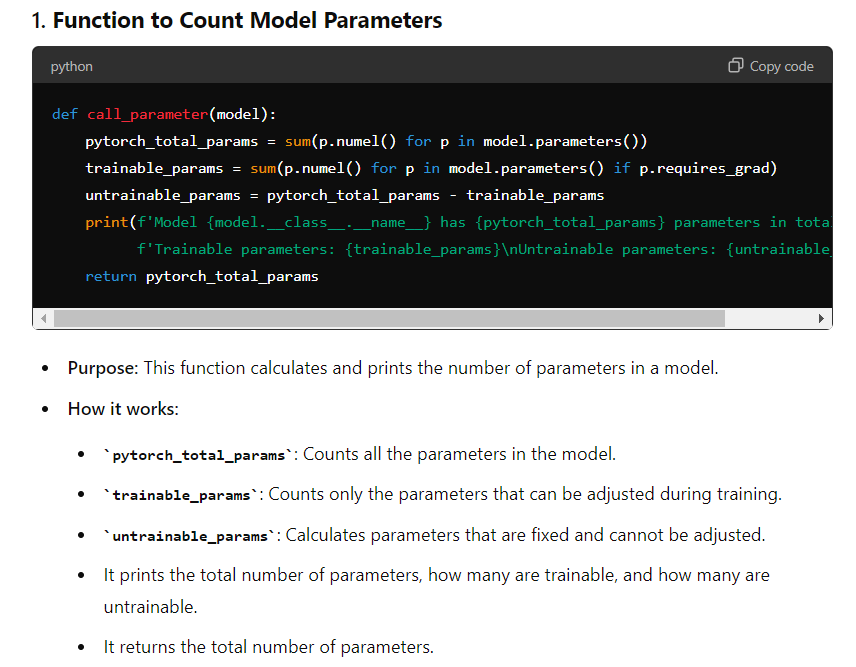

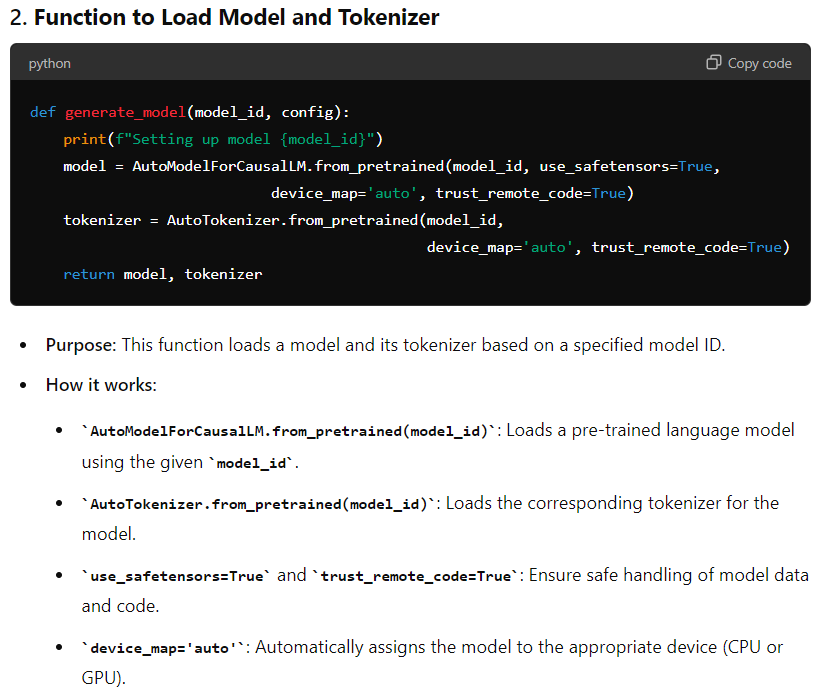

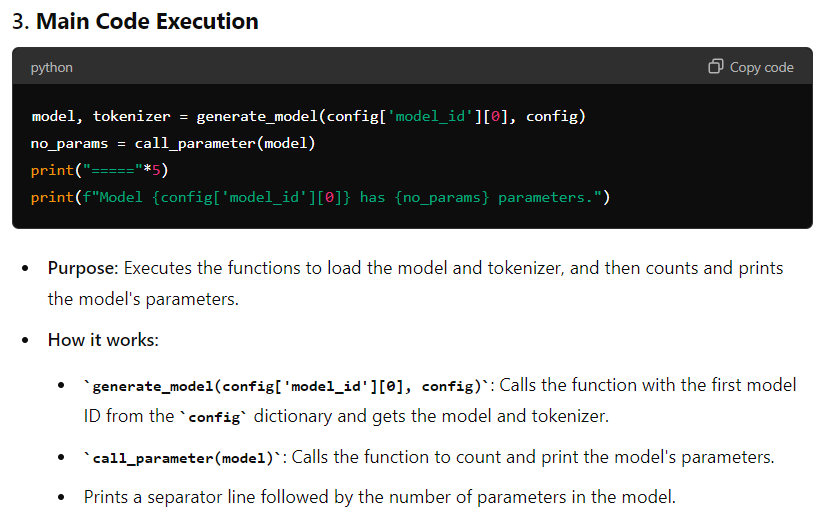

In [5]:
# Defines a function to call the number of parameters of a model.
def call_parameter(model):
  pytorch_total_params = sum(p.numel() for p in model.parameters())
  trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
  untrainable_params = pytorch_total_params - trainable_params
  print(f'Model {model.__class__.__name__} has {pytorch_total_params} parameters in total\n'\
        f'Trainable parameters: {trainable_params}\nUntrainable parameters: {untrainable_params}')
  return pytorch_total_params

# ===== Start calling the model and the tokenizer.
def generate_model(model_id, config):
  print(f"Setting up model {model_id}")
  model = AutoModelForCausalLM.from_pretrained(model_id, use_safetensors=True,
                            device_map='auto', trust_remote_code=True)
  tokenizer = AutoTokenizer.from_pretrained(model_id,
                                            device_map='auto', trust_remote_code=True)
  return model, tokenizer

model, tokenizer = generate_model(config['model_id'][0], config)
no_params = call_parameter(model)
print("====="*5)
print(f"Model {config['model_id'][0]} has {no_params} parameters.")

Setting up model TheBloke/Llama-2-7b-Chat-GPTQ


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/789 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:4674: FutureWarning: `_is_quantized_training_enabled` is going to be deprecated in transformers 4.39.0. Please use `model.hf_quantizer.is_trainable` instead
  warnings.warn(
Some weights of the model checkpoint at TheBloke/Llama-2-7b-Chat-GPTQ were not used when initializing LlamaForCausalLM: ['model.layers.0.mlp.down_proj.bias', 'model.layers.0.mlp.gate_proj.bias', 'model.layers.0.mlp.up_proj.bias', 'model.layers.0.self_attn.k_proj.bias', 'model.layers.0.self_attn.o_proj.bias', 'model.layers.0.self_attn.q_proj.bias', 'model.layers.0.self_attn.v_proj.bias', 'model.layers.1.mlp.down_proj.bias', 'model.layers.1.mlp.gate_proj.bias', 'model.layers.1.mlp.up_proj.bias', 'model.layers.1.self_attn.k_proj.bias', 'model.layers.1.self_attn.o_proj.bias', 'model.layers.1.self_attn.q_proj.bias', 'model.layers.1.self_attn.v_proj.bias', 'model.layers.10.mlp.down_proj.bias', 'model.layers.10.mlp.gate_proj.bias', 'model.layers.10.mlp

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


Model LlamaForCausalLM has 262410240 parameters in total
Trainable parameters: 262410240
Untrainable parameters: 0
Model TheBloke/Llama-2-7b-Chat-GPTQ has 262410240 parameters.


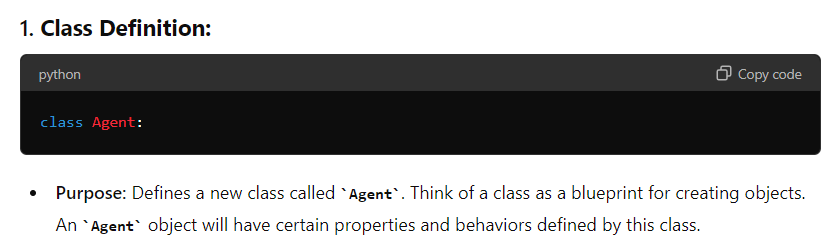

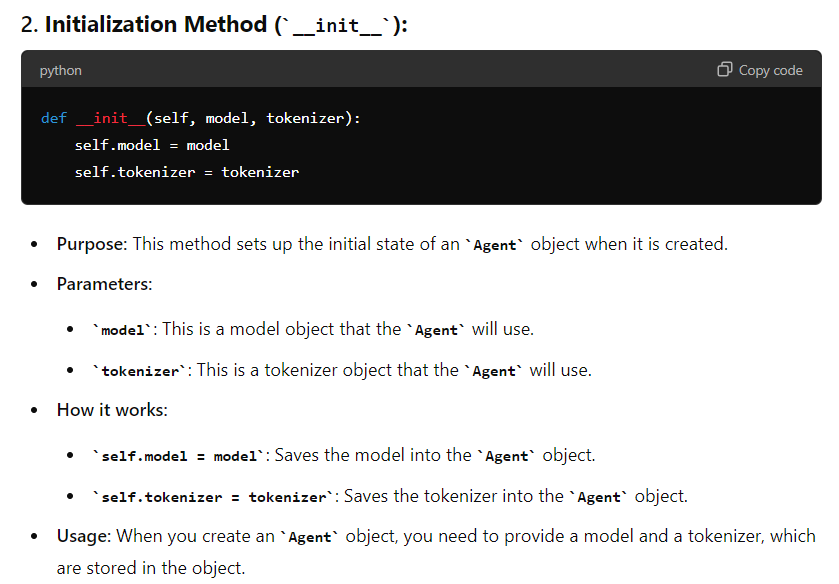

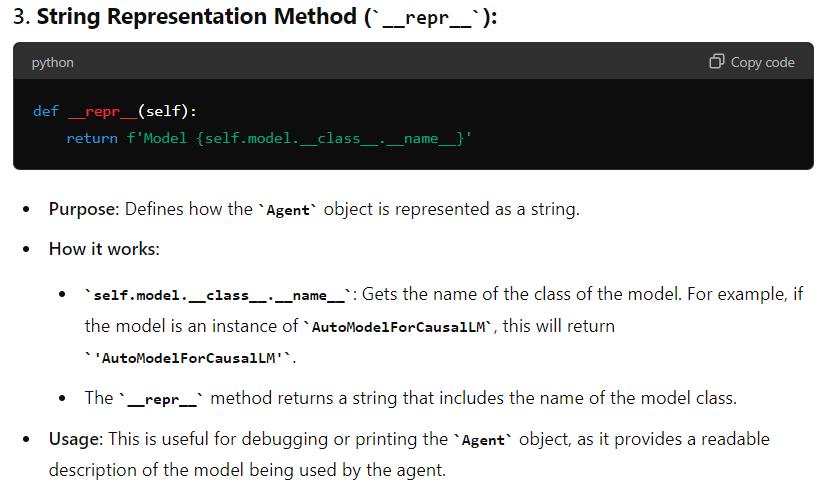

In [6]:
class Agent:
  def __init__(self, model, tokenizer):
    self.model = model
    self.tokenizer = tokenizer

  def __repr__(self):
    return f'Model {self.model.__class__.__name__}'

Certainly! Let’s break down the `Generator` class and the associated code step by step:

### 1. **Class Definition:**

```python
class Generator:
```
- **Purpose:** Defines a new class called `Generator`. This class is designed to create and use a text generation pipeline.

### 2. **Initialization Method (`__init__`):**

```python
def __init__(self, config, agent, template):
    self.agent = agent
    pipeline = transformers.pipeline(
        "text-generation",
        model=self.agent.model,
        tokenizer=self.agent.tokenizer,
        torch_dtype=torch.bfloat16,
        trust_remote_code=True,
        device_map="auto",
        max_length=config['model']['max_length'],
        do_sample=True,
        top_k=config['model']['top_k'],
        num_return_sequences=config['model']['num_return'],
        pad_token_id=tokenizer.eos_token_id
    )
    llm = HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature': config['model']['temperature']})
    prompt = PromptTemplate(template=template, input_variables=["text"])
    self.llm_chain = LLMChain(prompt=prompt, llm=llm)
```

- **Parameters:**
  - `config`: A dictionary with model configuration settings.
  - `agent`: An instance of the `Agent` class that provides the model and tokenizer.
  - `template`: A string template used to format the input text for generation.

- **How it works:**
  - **Setup of `pipeline`:**
    - Creates a text generation pipeline using the model and tokenizer from the `agent`.
    - Configures various settings like `torch_dtype`, `max_length`, `top_k`, etc.
    - `do_sample=True` allows for generating diverse outputs rather than deterministic ones.
    - `pad_token_id=tokenizer.eos_token_id` sets the padding token to the end-of-sequence token.
  
  - **Setup of `llm`:**
    - Uses `HuggingFacePipeline` to wrap the pipeline and add additional parameters, like `temperature` to control the randomness of the output.
  
  - **Setup of `prompt`:**
    - Creates a `PromptTemplate` using the provided template and specifies that `{text}` will be replaced with the actual input text.
  
  - **Setup of `llm_chain`:**
    - Combines the `PromptTemplate` and the `HuggingFacePipeline` into an `LLMChain`, which manages the entire text generation process.

### 3. **Generation Method (`generate`):**

```python
def generate(self, text):
    result = self.llm_chain.invoke(text)
    return result
```
- **Purpose:** Generates text based on the provided input text.
- **How it works:**
  - **`self.llm_chain.invoke(text)`:** Uses the previously set up `LLMChain` to process the input text using the model and template.
  - **Returns:** The generated text based on the input and the configuration.

### 4. **Defining Template and Agent:**

```python
template = """
              Write a summary of the following text delimited by triple backticks.
              Return your response which covers the key points of the text.
              ```{text}```
              SUMMARY:
           """
```
- **Purpose:** Provides a template that specifies how the input text should be summarized. The `{text}` placeholder will be replaced by the actual text to summarize.

```python
agent = Agent(model, tokenizer)
llm_agent = Generator(config, agent, template)
```
- **Purpose:** Creates an `Agent` object with the model and tokenizer.
- **Creates a `Generator` object (`llm_agent`):**
  - Initializes it with the `config`, `agent`, and `template` to set up the text generation process.

### Summary

In simple terms:

1. **`Generator` Class:** This class sets up a text generation system using a model and tokenizer.
2. **Initialization (`__init__`):** Sets up a pipeline for text generation with specific configurations and creates a system to manage text generation using a provided template.
3. **`generate` Method:** Takes input text, uses the set-up system to generate output, and returns it.
4. **Template and Agent Setup:** Defines a template for generating summaries and creates instances of `Agent` and `Generator` to use the model for text generation.

In [7]:
class Generator:
  def __init__(self, config, agent, template):
    self.agent = agent
    pipeline = transformers.pipeline(
        "text-generation",
        model=self.agent.model,
        tokenizer=self.agent.tokenizer,
        torch_dtype=torch.bfloat16,
        trust_remote_code=True,
        device_map="auto",
        max_length=config['model']['max_length'],
        do_sample=True,
        top_k=config['model']['top_k'],
        num_return_sequences=config['model']['num_return'],
        pad_token_id=tokenizer.eos_token_id
    )
    llm = HuggingFacePipeline(pipeline=pipeline, model_kwargs={'temperature': config['model']['temperature']})
    prompt = PromptTemplate(template=template, input_variables=["text"])
    self.llm_chain = LLMChain(prompt=prompt, llm=llm)

  def generate(self, text):
    result = self.llm_chain.invoke(text)
    return result

# Defining template
template = """
              Write a summary of the following text delimited by triple backticks.
              Return your response which covers the key points of the text.
              ```{text}```
              SUMMARY:
           """

# Defining an agent
agent = Agent(model, tokenizer)
llm_agent = Generator(config, agent, template)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:151: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(


In [8]:
text = """
  AI is also playing an increasingly important role in sustainability efforts, with some tech giants like Microsoft, Google, and IBM leveraging AI to reduce climate harms.

These technologies, such as machine learning and data analytics, enable the smart grid to predict energy demand, optimise energy distribution, and even foresee potential failures before they occur.

AI-driven energy management systems can also analyse vast amounts of data from various sources, including weather forecasts, energy consumption patterns, and grid performance metrics. This analysis can help in building systems that automate energy production and distribution, ensuring that the supply meets the demand efficiently.

Australia is at high risk of experiencing cyber threats through OT technology, which affects the nation’s renewable ambitions. With 82% of organisations experiencing cyber attacks through OT systems, there is growing risk being introduced into Australia’s energy grid as it digitalises.

The nation is also increasingly reliant on a highly decentralised approach to energy, meaning that the attack surface is far greater. For example, rooftop solar — solar panels on individual homes and businesses that are then connected to the grid via IoT devices, software, and digital technologies — is a contributing factor to 40% of Australia’s energy now being supplied by renewable sources.

The increasing integration of renewable energy sources, such as solar and wind, into Australia’s energy grid has made it a prime target for cybercriminals. The adoption of smart devices and IoT technologies in the energy sector has expanded the attack surface, making it easier for hackers to infiltrate and disrupt operations.

For Australia to successfully leverage renewable energy, they must establish strong IT foundations.

The Australian Energy Sector Cyber Security Framework is a good regulatory step, leveraging successful frameworks, such as the U.S. Department of Energy’s Electricity Subsector Cybersecurity Capability Maturing Model, and harmonising it with Australian-specific control references, such as the ACSC Essential 8.

However, it’s also important for the IT channel — including IT professionals and service providers — and IT professionals to bring the skills and knowledge to manage and secure the integrated energy systems. This includes understanding the unique challenges of OT environments and how to apply IT solutions effectively.

This strategy can enable Australia to target a renewable energy transition that is not only successful but also secure against a growing number of cyber attacks.
"""

llm_agent.generate(text)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1376: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed soon, in a future version. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(


{'text': '\n              Write a summary of the following text delimited by triple backticks.\n              Return your response which covers the key points of the text.\n              ```\n  AI is also playing an increasingly important role in sustainability efforts, with some tech giants like Microsoft, Google, and IBM leveraging AI to reduce climate harms.\n\nThese technologies, such as machine learning and data analytics, enable the smart grid to predict energy demand, optimise energy distribution, and even foresee potential failures before they occur.\n\nAI-driven energy management systems can also analyse vast amounts of data from various sources, including weather forecasts, energy consumption patterns, and grid performance metrics. This analysis can help in building systems that automate energy production and distribution, ensuring that the supply meets the demand efficiently.\n\nAustralia is at high risk of experiencing cyber threats through OT technology, which affects the 